____________________
<h3><b>2. Data exploration</b></h3>

____________________

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import tensorflow as tf #tf version is 1.12
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [2]:
#import data
 with np.load('features_mobilenet_v2.npz', allow_pickle=False) as npz_file:
    #features
    X_train = npz_file['train_hl']
    X_val = npz_file['validation_hl']
    X_test = npz_file['test_hl']
    #labels
    y_train = npz_file['labels_train']
    y_val = npz_file['labels_validation']
    y_test = npz_file['labels_test']
    #imgs
    train_imgs = npz_file['train_imgs']
    validation_imgs = npz_file['validation_imgs']
    test_imgs = npz_file['test_imgs']

_____________________
><h5><b>2.1. Plot images</b></h5>

___________________

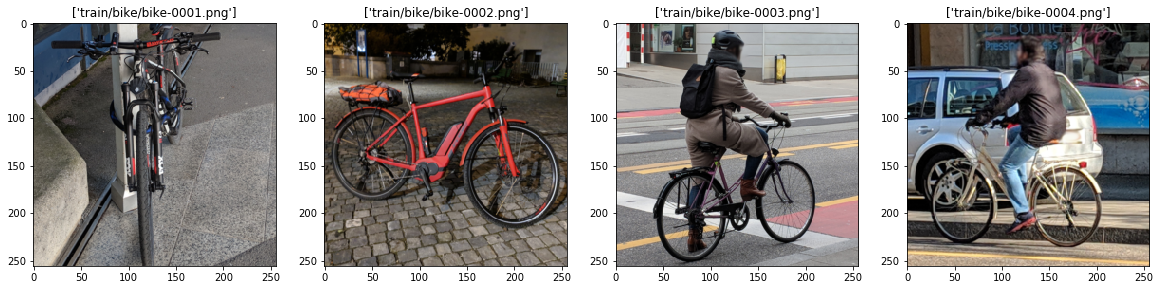

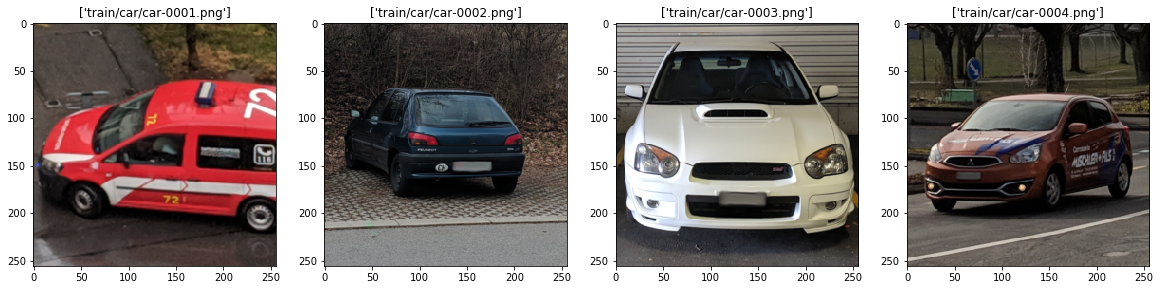

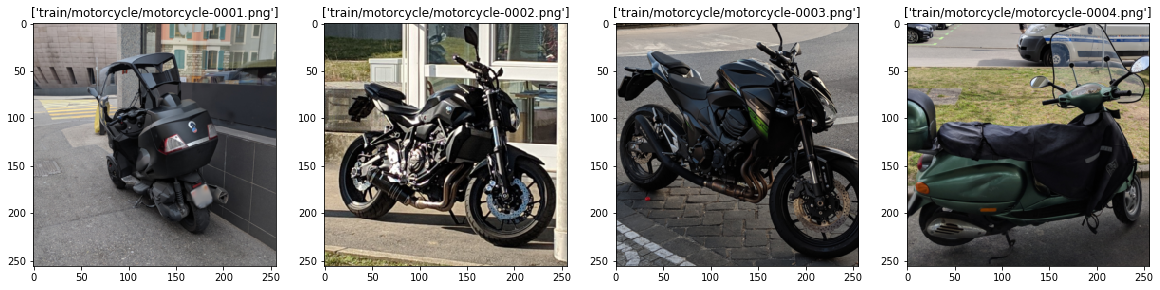

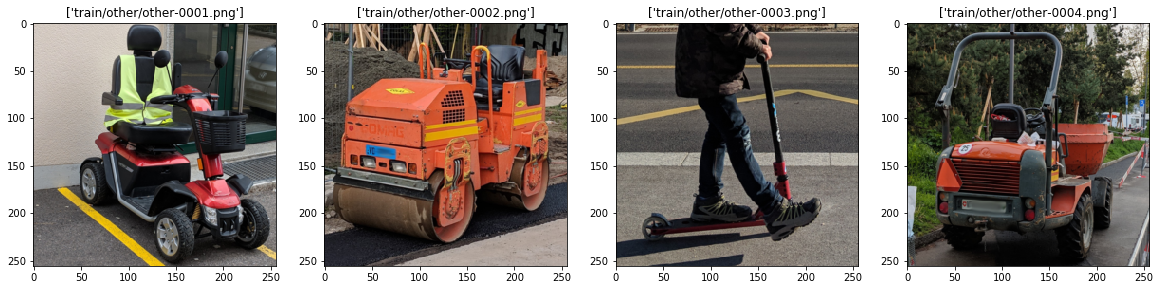

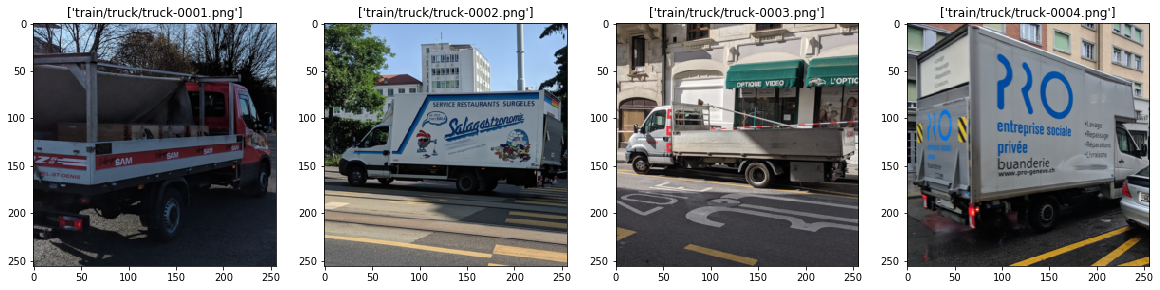

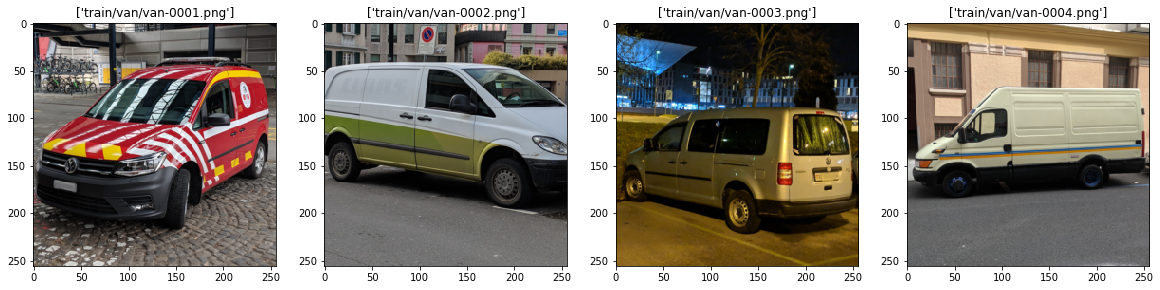

In [3]:
#plot 4 images for each class (train set)
import matplotlib.image as mpimg

directory=os.listdir('train')
for each in directory:
    plt.figure(figsize=(20, 10))
    currentFolder = 'train/' + each
    for i, file in enumerate (os.listdir(currentFolder)[0:4]):
        fullpath = currentFolder+ "/" + file
        img=mpimg.imread(fullpath)
        plt.subplot(1, 4, i  + 1)
        plt.title([fullpath])
        plt.imshow(img)

_____________________
><h5><b>2.2. PCA</b></h5>

___________________

In [4]:
#standardize the X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train)

#pca
from sklearn.decomposition import PCA
pca = PCA(n_components=None)#pca transformer (set to none to use all the components)
pca_scores = pca.fit_transform(X_train_rescaled)#apply pca

#print the results
print('loadings matrix:', pca.components_.shape)
#in case of confusion about the components_ shape and on which axis are located the features and components (it might not be trivial while using fit_transform)
#call pca.n_features_ and pca.n_components_
print('scores matrix:', pca_scores.shape)# aka eigenvalues

loadings matrix: (280, 1280)
scores matrix: (280, 280)


In [5]:
#create a df of loadings 
loadings_train= pd.DataFrame(pca.components_)#loading vectors

loadings_train.columns = [col + 1 for col in loadings_train.columns]#rename the features
loadings_train = loadings_train.add_prefix ('feature_')#add the same prefix to all the columns

loadings_train = loadings_train.T#transpose the matrix !!by default components are rows and features/variables columns
loadings_train.index.name = 'features'#add a name to the index (features) to simplify the data manipulation

loadings_train.columns = [col + 1 for col in loadings_train.columns]# + 1 to each column to start from 1 instead of 0
loadings_train = loadings_train.add_prefix ('principal_component_')#add the same prefix to all the columns

loadings_train.head(5)

,principal_component_1,principal_component_2,principal_component_3,principal_component_4,principal_component_5,principal_component_6,principal_component_7,principal_component_8,principal_component_9,principal_component_10,...,principal_component_271,principal_component_272,principal_component_273,principal_component_274,principal_component_275,principal_component_276,principal_component_277,principal_component_278,principal_component_279,principal_component_280
features,,,,,,,,,,,,,,,,,,,,,
feature_1,-0.012220,-0.050536,-0.036766,0.041408,-0.004017,-0.004187,0.008459,-0.001582,0.069768,-0.013235,...,0.007113,0.034334,-0.045673,-0.008771,-0.005762,-0.055130,0.014764,-0.022592,-0.012983,-0.000205
feature_2,0.022021,0.003008,-0.010071,0.021582,-0.011037,0.020993,-0.001325,0.027287,0.024471,-0.061983,...,0.041912,-0.053510,0.022435,-0.025385,0.024251,0.012592,0.003205,-0.049901,0.001305,-0.023347
feature_3,0.008060,0.039688,-0.007438,0.057925,-0.008871,-0.007598,0.041891,0.050969,-0.001000,-0.004945,...,0.016151,0.017892,-0.026914,0.015103,0.026427,-0.015419,0.003103,-0.035912,0.007332,-0.018609
feature_4,0.009685,0.035376,-0.002079,0.007231,-0.011329,-0.064642,0.002514,0.003899,-0.007984,-0.019079,...,0.014792,0.020080,-0.001466,0.019017,-0.049649,-0.013180,0.044746,0.040620,-0.034151,0.003349
feature_5,0.028305,-0.006630,0.061298,0.032594,-0.016840,0.030605,0.006598,0.053787,0.032494,0.027936,...,-0.033279,0.004987,-0.003633,0.000604,-0.009433,0.016804,-0.008062,-0.019829,0.005853,-0.028503


In [6]:
#variance ratio table
pca_variance_ratio_train = pd.DataFrame({'principal_component' : range(1, 280 + 1 ,1),#create a series for the components
                                   'proportion_of_variance_explained' : pca.explained_variance_ratio_,
                                   'cumulative' : pca.explained_variance_ratio_.cumsum()})#this is just for the following scree plot

pca_variance_ratio_train.round(3).head(5)

,principal_component,proportion_of_variance_explained,cumulative
0,1,0.096,0.096
1,2,0.058,0.153
2,3,0.053,0.207
3,4,0.037,0.244
4,5,0.028,0.272


> <b>2.3. Scree plot</b>

Here only the first 50 components are displayed to simplify the visualizatuion

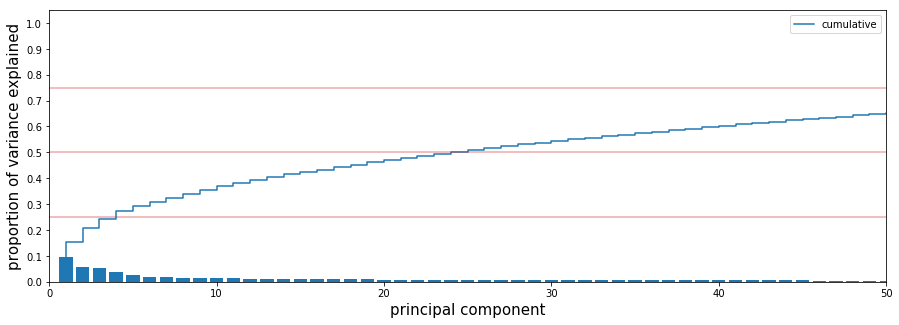

In [7]:
#scree plot
plt.figure(figsize=(15,5))

plt.bar(pca_variance_ratio_train.principal_component, pca_variance_ratio_train.proportion_of_variance_explained)
plt.step(pca_variance_ratio_train.principal_component, pca_variance_ratio_train.cumulative, label='cumulative')#this is based on cumsum (check above)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlim(0, 50)#set limit x to 50
plt.legend()

plt.axhline(y=0.25, c='C3', alpha=0.4)#these lines indicates respectively the 25, 50, 75% of explained variance
plt.axhline(y=0.5, c='C3', alpha=0.4)
plt.axhline(y=0.75, c='C3', alpha=0.4)


plt.xlabel('principal component', fontsize=15)
plt.ylabel('proportion of variance explained', fontsize=15);

In [8]:
#create a vocabulary
variance_explained_steps = {'10%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.1].count(),
                            '20%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.2].count(),
                            '30%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.3].count(),
                            '40%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.4].count(),
                            '50%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.5].count(),
                            '60%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.6].count(),
                            '70%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.7].count(),
                            '80%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.8].count(),
                            '90%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=0.9].count(),
                            '100%': pca_variance_ratio_train.cumulative[pca_variance_ratio_train.cumulative <=1.01].count()}#the exact maximum is 1.0000004 probably due to the float32 dtype

#convert the vocabulary in df
variance_explained_steps = pd.DataFrame(list(variance_explained_steps.items()),columns = ['proportion_of_variance_explained','number_of_components']) 

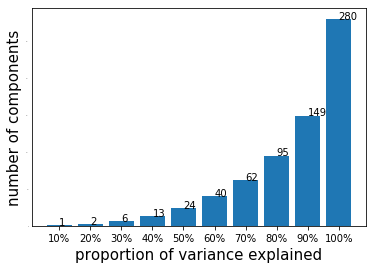

In [9]:
#plot amount of variance explained by the cumulative sum of components
plt.bar(variance_explained_steps.proportion_of_variance_explained, variance_explained_steps.number_of_components)
plt.xlabel('proportion of variance explained', fontsize=15)
plt.ylabel('number of components', fontsize=15)
plt.tick_params(axis='y', labelsize=0, length = 0)#turn off the y ticks to avoid confusion 

#write the number of components on each bar
for index, value in enumerate(variance_explained_steps.number_of_components):
    plt.text(index, value,
             str(value));

In the above graph, the number on each bar represents the number of components explaining a percentage of variance in steps of 10. It is possible to notice that starting from component 150 there is a significant drop in the amount of explained variance (i.e. it takes 131 components to explain 10% of the variance). 

> <b>2.4. Biplot</b>

Biplot using the first two components and the first 10 features

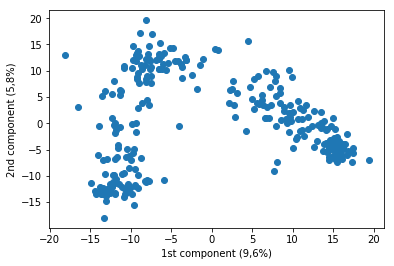

In [10]:
#plot scores (eigenvalues)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1])
plt.xlabel('1st component (9,6%)') # % explained variance
plt.ylabel('2nd component (5,8%)'); # % explained variance

Considering the scores of the first 2 components looks like there are 3 main clusters of data. The first 2 are < 0 on the 1st component and respectively 1 above and 1 below 0 on the second component. The third is above 0 on the 1st component.

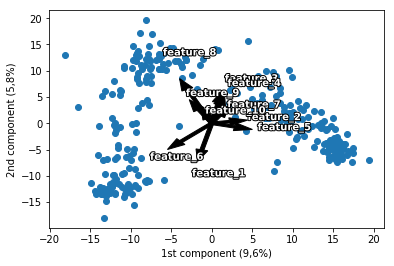

In [11]:
#plot scores (eigenvalues)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1])
plt.xlabel('1st component (9,6%)') # % explained variance
plt.ylabel('2nd component (5,8%)') # % explained variance

#plot loadings
import matplotlib.patheffects as path_effects

for features in ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',]:#plot the first 10 features (arbitrary)
    # Get weights
    weight1 = loadings_train.loc[features, 'principal_component_1']*100 # rescale them
    weight2 = loadings_train.loc[features, 'principal_component_2']*100 # (100 is arbitrary)

    # Plot arrows
    plt.arrow(
        0, 0, # Vector starts at (x,y)=(0,0)
        weight1, weight2, # ends at (x,y)=(weight1, weight2)
        color='black', width=0.5)

    # Add text
    text = plt.text(
        weight1 * 2, # x location (1.5 is arbitrary)
        weight2 * 2, # y location
        features, # Feature name
        weight='bold', color='white')

    # Make the text stand out
    text.set_path_effects([
        path_effects.Stroke(linewidth=2, foreground='black'),
        path_effects.Normal()])